In [4]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\GSE164378\Hao_PBMC_GSE_level1_rep_cells_onlyLog1p.h5ad")
print('Original adata:', adata.shape)
label = adata.obs['celltype.l1'].tolist()
types = np.unique(label).tolist()
print('all cell types:', types)
print('====================')
# del adata


Original adata: (32349, 33538)
all cell types: ['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other', 'other_T']


In [8]:
adata.obs.head()

,celltype.l1,celltype.l2,celltype.l3,Phase,Batch,donor,nCount_ADT,nFeature_ADT,nCount_RNA,nFeature_RNA,leiden,is_representative,cluster_representative
L1_AAACCCACATCAGTCA,CD8_T,CD8_TEM,CD8 TEM_1,G1,Batch1,P3,5297,212,4332,1633,12,Yes,Yes_CD8 T
L1_AAACGAACAATGAGCG,CD4_T,CD4_TCM,CD4 TCM_2,G1,Batch1,P1,5465,211,7379,2315,27,Yes,Yes_CD4 T
L1_AAACGAACAGCTACTA,NK,NK,NK_2,G1,Batch1,P4,3161,211,1538,822,21,Yes,Yes_NK
L1_AAACGCTAGGTCGTCC,CD8_T,CD8_TEM,CD8 TEM_2,S,Batch1,P1,7332,208,5120,1688,12,Yes,Yes_CD8 T
L1_AAACGCTCAACGATCT,CD8_T,CD8_TCM,CD8 TCM_1,S,Batch1,P3,4665,205,4593,1435,0,Yes,Yes_CD8 T


In [9]:
adata.var_names

Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3',
       'AL627309.2', 'AL627309.4', 'AL732372.1', 'OR4F29', 'AC114498.1',
       ...
       'AC007325.2', 'BX072566.1', 'AL354822.1', 'AC023491.2', 'AC004556.1',
       'AC233755.2', 'AC233755.1', 'AC240274.1', 'AC213203.1', 'FAM231C'],
      dtype='object', length=33538)

## Read features

In [3]:
import os
os.chdir(r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao_GSE\L1_by_lossdiff\feature_selection")

features_dict = {}
# Read features for each celltype
for celltype in types:
    try:
        feature_df = pd.read_csv(f'{celltype}_features.txt', names=['Gene', 'Weight', 'Tendency'], sep='\t')
        features_dict[celltype] = feature_df
    except:
        print('skipping:', celltype)
        continue
    # print(celltype, 'Feature count:', feature_df.shape[0])
    # print(celltype, 'Positive feature count:', feature_df[feature_df['Tendency'] == 1].shape[0])
    # print('------------------')

In [4]:
count_df = pd.DataFrame(columns=['Feature_count', 'Positive_feature_count'])
for celltype in features_dict.keys():
    feature_df = features_dict[celltype]
    feature_count = feature_df.shape[0]
    positive_count = feature_df[feature_df['Tendency'] == 1].shape[0]
    count_df.loc[celltype] = [feature_count, positive_count]
count_df

,Feature_count,Positive_feature_count
B,13,7
CD4_T,200,83
CD8_T,25,6
DC,25,15
Mono,21,11
NK,28,14
other,42,27
other_T,61,26


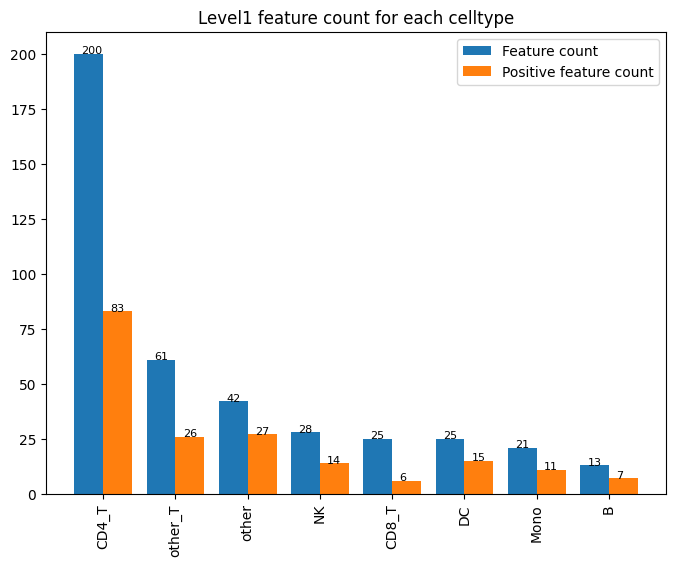

In [5]:
# Sort count_df by 'Feature_count' in descending order
count_df = count_df.sort_values('Feature_count', ascending=False)

# plot barplot
fig, ax = plt.subplots(figsize=(8, 6))
x = np.arange(len(count_df.index))
bar_width = 0.4

ax.bar(x - bar_width/2, count_df['Feature_count'], bar_width, label='Feature count')
ax.bar(x + bar_width/2, count_df['Positive_feature_count'], bar_width, label='Positive feature count')

# Add the values to each bar
for i, v in enumerate(count_df['Feature_count']):
    plt.text(i-0.3, v, str(v), fontsize=8)
for i, v in enumerate(count_df['Positive_feature_count']):
    plt.text(i+0.1, v, str(v), fontsize=8)

ax.set_xticks(x)
ax.set_xticklabels(count_df.index)
plt.xticks(rotation=90)
plt.title('Level1 feature count for each celltype')
ax.legend()
# plt.savefig('L2_feature_count.png', dpi=300, bbox_inches='tight')
plt.show()

## Plot cell number

In [6]:
adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\GSE164378\Hao_PBMC_GSE164378.h5ad")
adata.obs['celltype.l1'] = adata.obs['celltype.l1'].str.replace(' ', '_')

In [7]:
counts = adata.obs['celltype.l1'].value_counts()
order = count_df.index.tolist()
counts = counts[order]
counts

celltype.l1
CD4_T      41001
other_T     6789
other       3442
NK         18664
CD8_T      25469
DC          3589
Mono       49010
B          13800
Name: count, dtype: int64

In [8]:
sum(counts)

161764

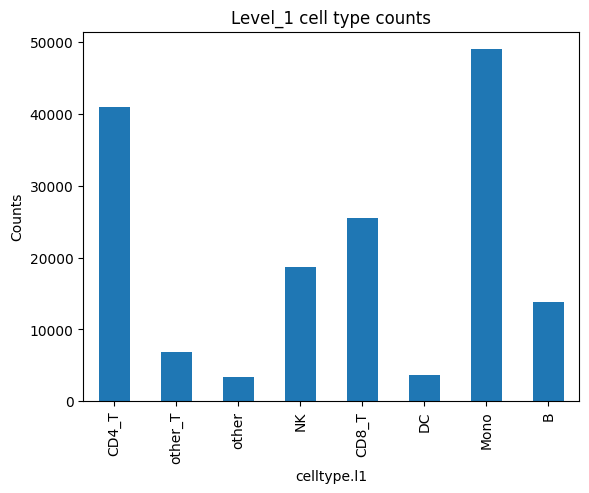

In [9]:
counts.plot(kind='bar')
plt.title('Level_1 cell type counts')
plt.ylabel('Counts')
plt.show()